In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Linear Regression

In [2]:
data=pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
x=data[["alcohol"]]
y=data.pH

In [5]:
xtrain, xtest, ytrain, ytest=train_test_split(x,y,test_size=0.2,random_state=9)

In [6]:
linear_model=LinearRegression()
linear_model.fit(xtrain,ytrain)

LinearRegression()

In [7]:
ypred=linear_model.predict(xtest)

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [9]:
mse=mean_squared_error(ytest,ypred)
mae=mean_absolute_error(ytest,ypred)
print(linear_model.coef_)
print(linear_model.intercept_)
print(f"Mean Squared Error= {mse:.4f}")
print(f"Mean Absolute Error= {mae:.4f}")

[0.03094336]
2.9874276395860533
Mean Squared Error= 0.0227
Mean Absolute Error= 0.1176


# Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
df=pd.read_csv("loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [12]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [91]:
X=df.drop([" loan_status"," education", " self_employed", "loan_id"],axis=1)
Y=df[" loan_status"]
X.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000


In [14]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=9)

In [15]:
log_model=LogisticRegression(max_iter=1000)
log_model.fit(x_train, y_train)

C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [16]:
ypred1=log_model.predict(x_test)

In [17]:
acc=accuracy_score(y_test, ypred1)
print(f"Accuracy={acc:.4f}")

Accuracy=0.7951


# Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
tree_model=DecisionTreeClassifier(max_depth=5)
tree_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [20]:
ypred2=tree_model.predict(x_test)

In [87]:
from sklearn.tree import plot_tree

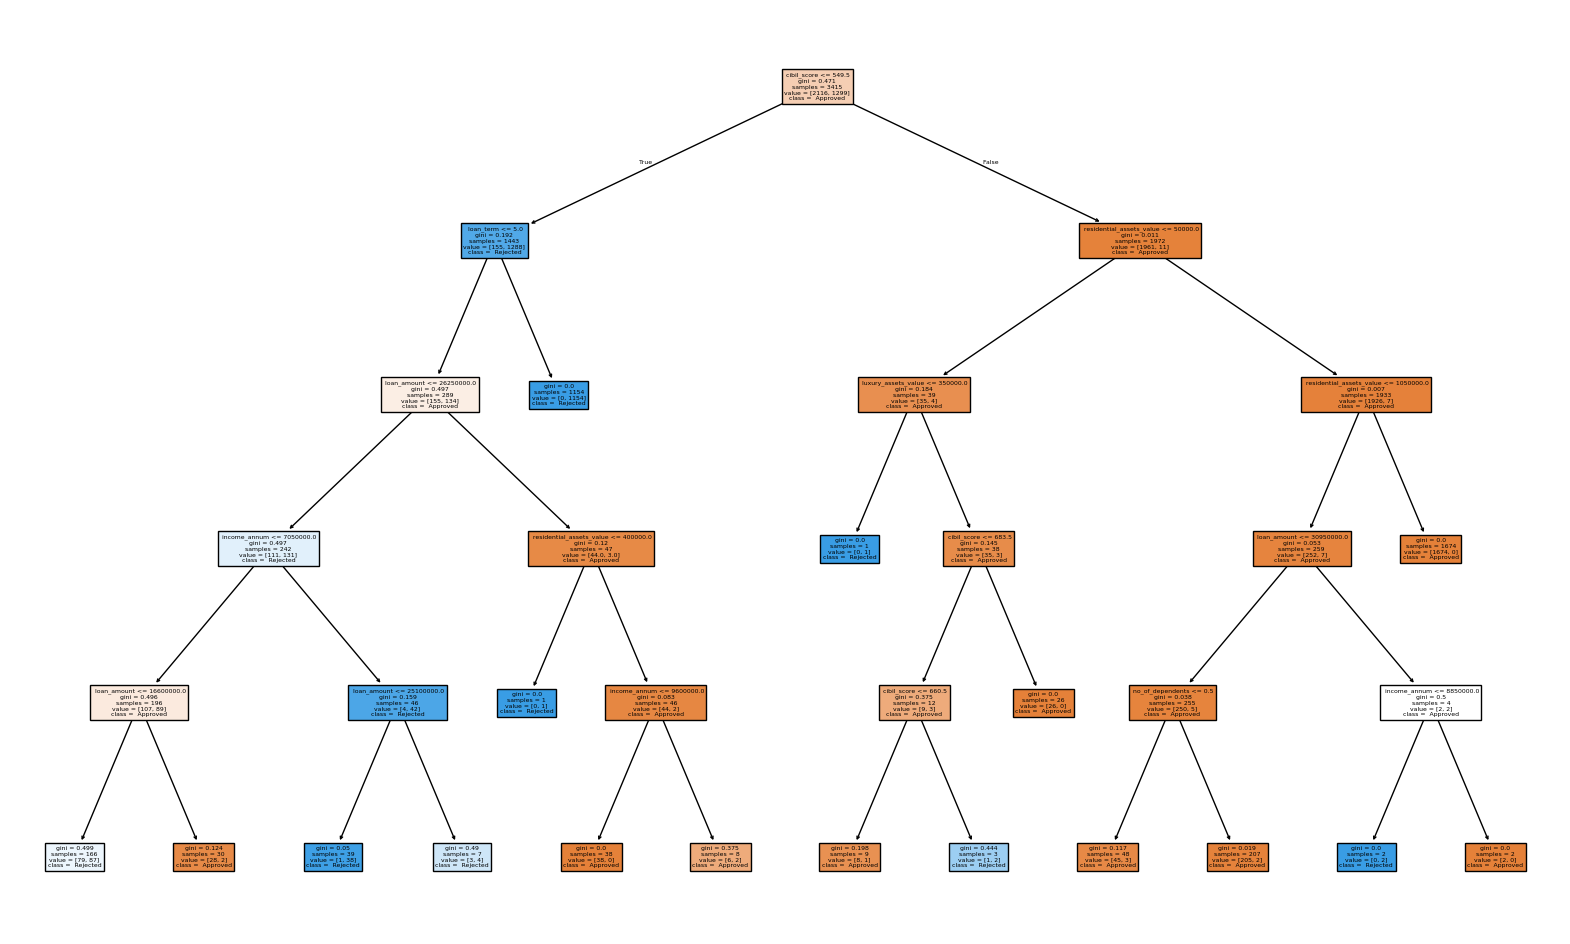

In [92]:
columns=X.columns.tolist()
clas=np.unique(Y).astype("str").tolist()
plt.figure(figsize=[20,12])
plot_tree(tree_model, filled=True, feature_names=columns, class_names=clas)
plt.show()

In [21]:
acc1=accuracy_score(y_test, ypred2)
print(f"Accuracy={acc1:.4f}")

Accuracy=0.9789


# Random Forest

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
forest_model=RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=40
)
forest_model.fit(x_train, y_train)

C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=5, random_state=40)

In [104]:
ypred3=forest_model.predict(x_test)

In [105]:
acc2=accuracy_score(y_test,ypred3)
print(f"Accuracy={acc2:.4f}")

Accuracy=0.9719


# Naive Bayes Classifier

In [94]:
from sklearn.naive_bayes import GaussianNB

In [95]:
nbmodel=GaussianNB()
nbmodel.fit(x_train, y_train)

C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [96]:
ypred4=nbmodel.predict(x_test)

In [97]:
acc3=accuracy_score(y_test, ypred4)
print(f"Accuracy={acc3:.4f}")

Accuracy=0.7752


# K Nearest Neighbor(KNN)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [23]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [24]:
x_train1, x_test1, y_train1, y_test1=train_test_split(X_scaled, Y, test_size=0.2, random_state=9)

In [25]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train1, y_train1)

C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [100]:
ypred5=knn.predict(x_test1)
acc4=accuracy_score(y_test1,ypred3)

In [101]:
print(f"Accuracy={acc4:.4f}")

Accuracy=0.9204


# Support Vector Machines (SVM)

In [28]:
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

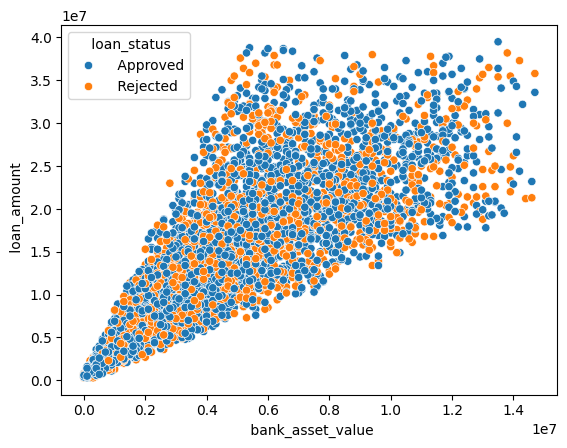

In [29]:
sns.scatterplot(data=df, x=" bank_asset_value", y=" loan_amount", hue=" loan_status")
plt.show()

In [30]:
X,Y=make_blobs(200, centers=2, cluster_std=1.7,random_state=10)

In [31]:
X=pd.DataFrame(data=X, columns=["Bank_Asset_Value", "Loan_Amount"])
X.head()

,Bank_Asset_Value,Loan_Amount
0,4.396739,3.326741
1,3.857467,-8.786384
2,1.444509,5.119115
3,3.010916,-10.739171
4,4.301074,6.361953


In [32]:
Y

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0])

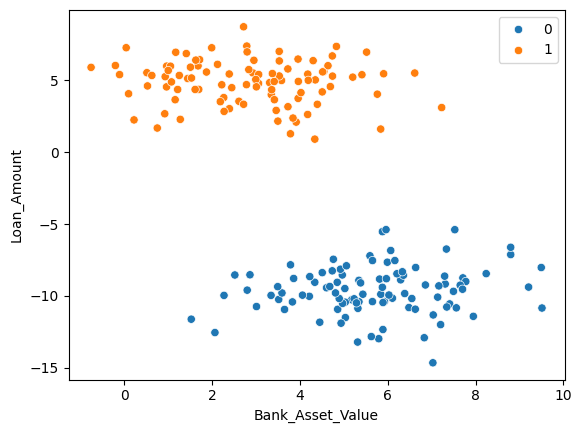

In [33]:
sns.scatterplot(data=X,x="Bank_Asset_Value",y="Loan_Amount",hue=Y)
plt.show()

In [34]:
svm_model=SVC(kernel="linear")
svm_model.fit(X,Y)

SVC(kernel='linear')

In [35]:
vectors=svm_model.support_vectors_
print(vectors)

[[ 5.96149429 -5.38995422]
 [ 4.33909072  0.90360523]]


C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


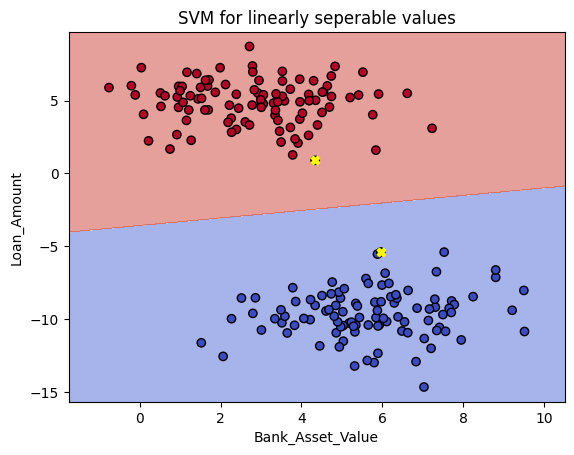

In [36]:
bank_min, bank_max=X["Bank_Asset_Value"].min()-1,X["Bank_Asset_Value"].max()+1
loan_min, loan_max=X["Loan_Amount"].min()-1,X["Loan_Amount"].max()+1

bank_grid,loan_grid=np.meshgrid(np.arange(bank_min,bank_max,0.02), np.arange(loan_min,loan_max,0.02))

prediction=svm_model.predict(np.c_[bank_grid.ravel(), loan_grid.ravel()])
prediction=prediction.reshape(bank_grid.shape)

plt.contourf(bank_grid,loan_grid, prediction, alpha=0.5, cmap="coolwarm")

plt.scatter(X["Bank_Asset_Value"],X["Loan_Amount"],c=Y,cmap="coolwarm",edgecolors="k")
plt.scatter(vectors[:,0],vectors[:,1], marker="X", c="yellow")

plt.xlabel("Bank_Asset_Value")
plt.ylabel("Loan_Amount")
plt.title("SVM for linearly seperable values")
plt.show()

In [37]:
from sklearn.datasets import make_circles

a,b=make_circles(200, noise=0.2, factor=0.1, random_state=9)

In [38]:
a=pd.DataFrame(a, columns=["Bank_Asset_Value", "Loan_Amount"])
a.head()

,Bank_Asset_Value,Loan_Amount
0,0.459398,-0.854307
1,-0.640959,-0.581235
2,-1.375904,-0.099139
3,0.094175,0.171946
4,-0.214972,-0.162663


In [39]:
b

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1])

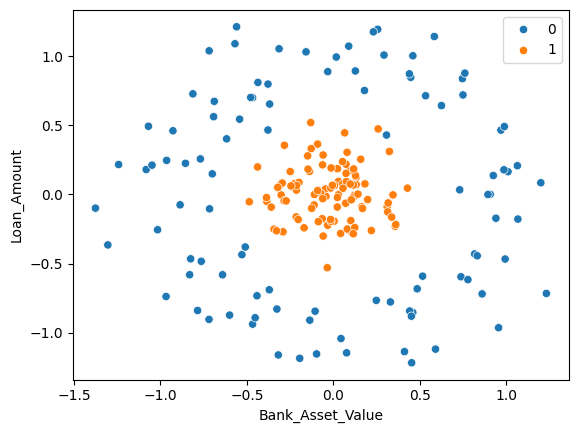

In [40]:
sns.scatterplot(data=a,x="Bank_Asset_Value",y="Loan_Amount",hue=b)
plt.show()

In [41]:
svm_model2=SVC(kernel="rbf")
svm_model2.fit(a,b)

SVC()

In [42]:
vectors2=svm_model2.support_vectors_
print(vectors2)

[[ 0.17996134  0.75207515]
 [-0.37827449  0.46616436]
 [ 0.53337776  0.71405301]
 [-0.70021928  0.1488771 ]
 [ 0.3074675   0.42983258]
 [-0.36844312  0.65407721]
 [-0.61730508  0.40230664]
 [ 0.24824452 -0.76647618]
 [ 0.51633776 -0.59128435]
 [-0.37059924 -0.68983951]
 [ 0.73069894  0.03351081]
 [-0.7158111  -0.10416689]
 [-0.52890872 -0.43578613]
 [-0.50952568 -0.38022603]
 [ 0.3579063  -0.23097956]
 [-0.34283881 -0.25134805]
 [ 0.3608341  -0.21802148]
 [-0.38469724 -0.05066859]
 [-0.28309717  0.35565567]
 [-0.13073657  0.51982903]
 [-0.03518202 -0.52990393]
 [ 0.06532761  0.44583234]
 [-0.29114804 -0.2702723 ]
 [-0.48619321 -0.05311847]
 [ 0.25898814  0.47425022]
 [-0.438279    0.19875511]
 [ 0.32405086  0.31083408]
 [-0.32859293 -0.26297985]]


C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


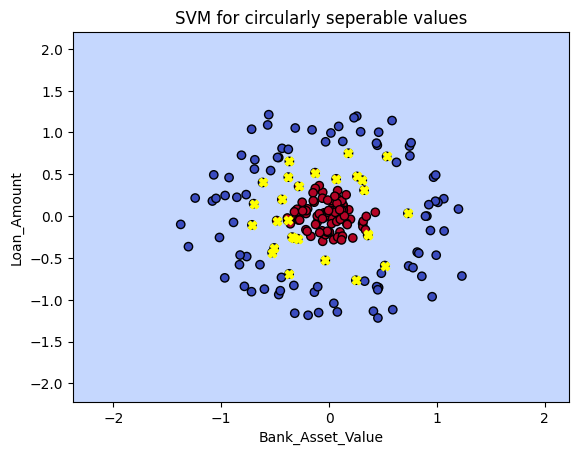

In [43]:
bank_min1, bank_max1=a["Bank_Asset_Value"].min()-1,a["Bank_Asset_Value"].max()+1
loan_min1, loan_max1=a["Loan_Amount"].min()-1,a["Loan_Amount"].max()+1

bank_grid1,loan_grid1=np.meshgrid(np.arange(bank_min1,bank_max1,0.02), np.arange(loan_min1,loan_max1,0.02))

prediction1=svm_model.predict(np.c_[bank_grid1.ravel(), loan_grid1.ravel()])
prediction1=prediction1.reshape(bank_grid1.shape)

plt.contourf(bank_grid1,loan_grid1, prediction1, alpha=0.5, cmap="coolwarm")

plt.scatter(a["Bank_Asset_Value"],a["Loan_Amount"],c=b,cmap="coolwarm",edgecolors="k")
plt.scatter(vectors2[:,0],vectors2[:,1], marker="X", c="yellow")

plt.xlabel("Bank_Asset_Value")
plt.ylabel("Loan_Amount")
plt.title("SVM for circularly seperable values")
plt.show()

# Time Series Modeling

In [54]:
time_data=pd.read_csv("AirPassengers.csv")
time_data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [55]:
time_data.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [56]:
time_data["Month"]=pd.to_datetime(time_data["Month"])
time_data.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [57]:
time_data=time_data.set_index(time_data["Month"])
time_data=time_data.drop("Month", axis=1)
time_data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


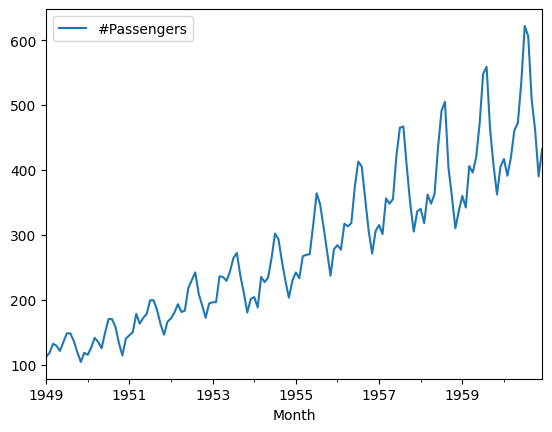

In [58]:
time_data.plot()
plt.show()

In [64]:
from statsmodels.tsa.stattools import adfuller

result=adfuller(time_data["#Passengers"])
print(result[1])

0.991880243437641


In [65]:
time_data["Shift1"]=time_data["#Passengers"].shift(1)
time_data.head()

,#Passengers,Shift1
Month,,
1949-01-01,112,NaN
1949-02-01,118,112.0
1949-03-01,132,118.0
1949-04-01,129,132.0
1949-05-01,121,129.0


In [66]:
time_data["diff1"]=time_data["#Passengers"]-time_data["Shift1"]
time_data.head()

,#Passengers,Shift1,diff1
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,112.0,6.0
1949-03-01,132,118.0,14.0
1949-04-01,129,132.0,-3.0
1949-05-01,121,129.0,-8.0


In [67]:
time_data.dropna(inplace=True)

In [69]:
result1=adfuller(time_data["diff1"])
result1[1]

np.float64(0.054213290283826696)

In [70]:
time_data["Shift2"]=time_data["diff1"].shift(1)
time_data.head()

,#Passengers,Shift1,diff1,Shift2
Month,,,,
1949-02-01,118,112.0,6.0,NaN
1949-03-01,132,118.0,14.0,6.0
1949-04-01,129,132.0,-3.0,14.0
1949-05-01,121,129.0,-8.0,-3.0
1949-06-01,135,121.0,14.0,-8.0


In [73]:
time_data["diff2"]=time_data["diff1"]-time_data["Shift2"]
time_data.head()

,#Passengers,Shift1,diff1,Shift2,diff2
Month,,,,,
1949-02-01,118,112.0,6.0,NaN,NaN
1949-03-01,132,118.0,14.0,6.0,8.0
1949-04-01,129,132.0,-3.0,14.0,-17.0
1949-05-01,121,129.0,-8.0,-3.0,-5.0
1949-06-01,135,121.0,14.0,-8.0,22.0


In [74]:
time_data.dropna(inplace=True)

In [75]:
result2=adfuller(time_data["diff2"])
result2[1]

np.float64(2.7328918500141235e-29)

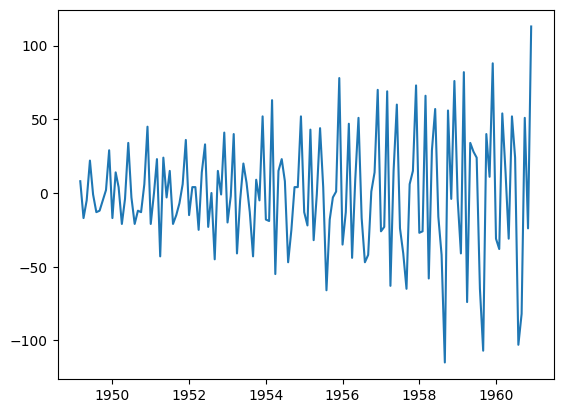

In [81]:
plt.plot(time_data["diff2"])
plt.show()

In [76]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

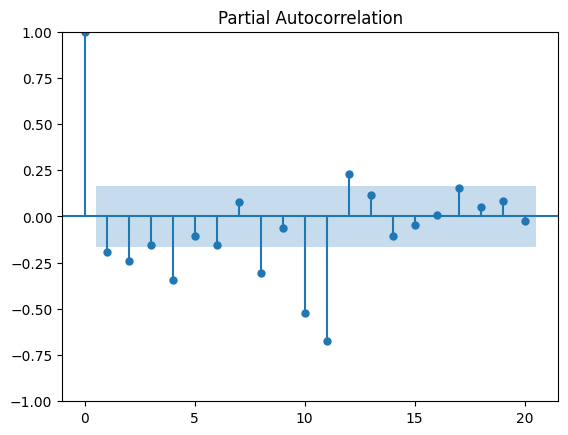

In [77]:
plot_pacf(time_data["diff2"],lags=20)
plt.show()

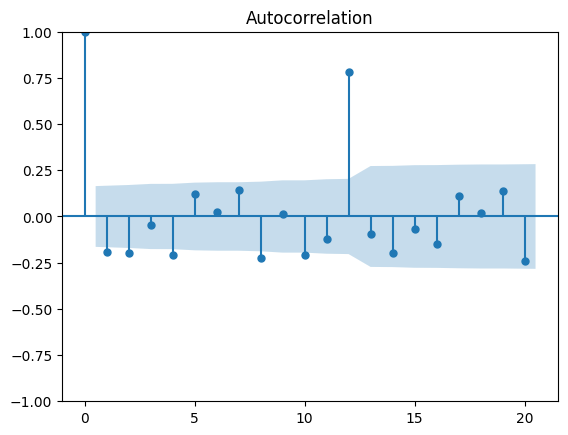

In [78]:
plot_acf(time_data["diff2"], lags=20)
plt.show()

In [80]:
from statsmodels.tsa.arima.model import ARIMA

model=ARIMA(time_data["#Passengers"],order=[2,2,2])
time_model=model.fit()

C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [85]:
result=time_model.get_forecast(steps=20)
forecasted=result.predicted_mean
print(forecasted)

1961-01-01    475.709361
1961-02-01    463.189865
1961-03-01    476.911793
1961-04-01    472.454283
1961-05-01    479.230418
1961-06-01    478.854718
1961-07-01    482.995782
1961-08-01    484.278149
1961-09-01    487.368771
1961-10-01    489.315414
1961-11-01    491.985757
1961-12-01    494.198271
1962-01-01    496.700417
1962-02-01    499.019335
1962-03-01    501.454168
1962-04-01    503.815670
1962-05-01    506.223563
1962-06-01    508.602108
1962-07-01    510.999219
1962-08-01    513.384585
Freq: MS, Name: predicted_mean, dtype: float64


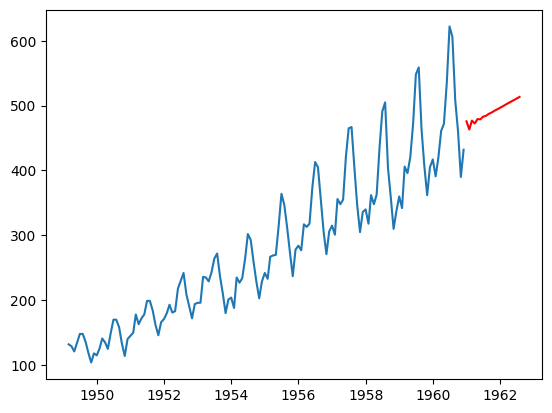

In [86]:
plt.plot(time_data["#Passengers"], label="Initial Passengers Count")
plt.plot(forecasted, color="red")
plt.show()